<a href="https://colab.research.google.com/github/polariswon/polariswon/blob/master/LSTM_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## warning들 없애기 위해 이걸 작성
import os
%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family']='NanumGothic'

In [3]:
!pip install finance-datareader 

In [4]:
import FinanceDataReader as fdr

In [5]:
samsung = fdr.DataReader('005930')

In [6]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-10-26,70600,71500,70400,71100,10528252,0.012821
2021-10-27,71000,71000,70000,70100,10295316,-0.014065
2021-10-28,69500,72200,69500,70700,20644902,0.008559
2021-10-29,71200,71600,69700,69800,17016151,-0.012730
2021-11-01,70200,70600,69900,69900,11411134,0.001433


In [7]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-10-06,1197,1215,1179,1185,53720,NaN
1997-10-07,1183,1183,1145,1149,68530,-0.030380
1997-10-08,1149,1149,1075,1076,60280,-0.063534
1997-10-09,1066,1097,1018,1051,96343,-0.023234
1997-10-10,1056,1068,1038,1067,47010,0.015224


In [8]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1997-10-06 to 2021-11-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [9]:
samsung.describe()

,Open,High,Low,Close,Volume,Change
count,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,21727.585333,21958.176167,21494.010500,21750.864833,2.768049e+06,0.001009
std,19148.657348,19318.021888,18976.562154,19144.832046,6.552261e+06,0.025743
min,0.000000,0.000000,0.000000,627.000000,0.000000e+00,-0.137566
25%,8200.000000,8347.500000,8090.000000,8250.000000,2.831702e+05,-0.012186
50%,14600.000000,14730.000000,14380.000000,14560.000000,4.626820e+05,0.000000
75%,28779.250000,28980.000000,28439.250000,28740.000000,8.525120e+05,0.012944
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.150000


In [10]:
apple = fdr.DataReader('AAPL')

In [11]:
apple.describe()

,Close,Open,High,Low,Volume,Change
count,10309.000000,10309.000000,10309.000000,10309.000000,1.030900e+04,10309.000000
mean,12.491756,12.487527,12.619372,12.353789,3.345430e+08,0.001044
std,26.327296,26.316366,26.599353,26.029476,3.406758e+08,0.034583
min,0.050000,0.050000,0.050000,0.050000,1.390000e+06,-0.998800
25%,0.280000,0.280000,0.290000,0.270000,1.266000e+08,-0.008200
50%,0.460000,0.460000,0.470000,0.450000,2.224800e+08,0.000000
75%,13.350000,13.250000,13.450000,13.050000,4.163200e+08,0.012200
max,156.690000,156.980000,157.260000,154.390000,7.430000e+09,0.277800


In [12]:
apple = fdr.DataReader('AAPL','2017')

In [13]:
ford = fdr.DataReader('F','1980-01-01','2019-12-30')

In [16]:
STOCK_CODE =  '005930'

In [17]:
stock = fdr.DataReader(STOCK_CODE)

In [18]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-10-06,1197,1215,1179,1185,53720,NaN
1997-10-07,1183,1183,1145,1149,68530,-0.030380
1997-10-08,1149,1149,1075,1076,60280,-0.063534
1997-10-09,1066,1097,1018,1051,96343,-0.023234
1997-10-10,1056,1068,1038,1067,47010,0.015224


In [20]:
stock['Year']=stock.index.year
stock['Month']=stock.index.month
stock['Day']=stock.index.day


In [21]:
stock.groupby('Year').mean()

,Open,High,Low,Close,Volume,Change,Month,Day
Year,,,,,,,,
1997,850.857143,873.928571,821.885714,846.728571,3.691145e+05,-0.006518,10.985714,15.742857
1998,1113.948630,1144.623288,1083.828767,1113.702055,6.127810e+05,0.003875,6.462329,15.801370
1999,3042.759036,3131.196787,2968.831325,3046.895582,8.627532e+05,0.005742,6.578313,15.582329
2000,5382.593361,5516.601660,5248.804979,5372.406639,1.118580e+06,-0.001001,6.464730,16.120332
2001,3993.719512,4071.313008,3927.918699,4003.617886,7.313713e+05,0.002954,6.524390,16.004065
2002,6859.209016,6971.897541,6752.295082,6865.122951,8.511943e+05,0.000935,6.524590,16.004098
2003,7446.457490,7545.068826,7352.323887,7454.453441,6.190000e+05,0.001734,6.493927,15.931174
2004,9647.698795,9765.811245,9523.477912,9647.389558,5.721826e+05,0.000240,6.618474,15.602410
2005,10729.016064,10835.558233,10634.220884,10739.236948,4.305591e+05,0.001628,6.578313,15.975904


In [22]:
stock.groupby(['Year','Month']).mean()

Open          High  ...    Change        Day
Year Month                              ...                     
1997 10      1008.000000   1026.782609  ... -0.024177  18.434783
     11       796.280000    817.440000  ...  0.005632  15.400000
     12       748.590909    778.318182  ... -0.002667  13.318182
1998 1       1107.272727   1133.727273  ...  0.040711  15.954545
     2       1527.791667   1569.083333  ...  0.006900  15.000000
...                  ...           ...  ...       ...        ...
2021 7      79645.454545  79963.636364  ... -0.001228  16.045455
     8      77204.761905  77914.285714  ... -0.000968  15.952381
     9      76526.315789  76884.210526  ... -0.001751  14.842105
     10     70852.631579  71373.684211  ... -0.003077  16.631579
     11     70200.000000  70600.000000  ...  0.001433   1.000000

[290 rows x 7 columns]

In [23]:
plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


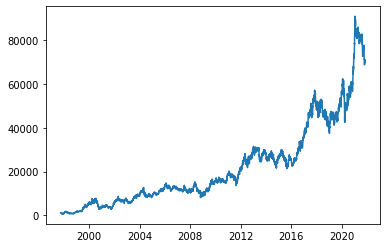

In [26]:
plt.plot(stock['Close'])

In [27]:
time_steps = [['1990','2000'],['2000','2005'],['2005','2010'],['2010','2015'],['2015','2020']]

In [30]:
stock.loc[(stock.index>=time_steps[0][0])&(stock.index<time_steps[1][1])]

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-10-06,1197,1215,1179,1185,53720,NaN,1997,10,6
1997-10-07,1183,1183,1145,1149,68530,-0.030380,1997,10,7
1997-10-08,1149,1149,1075,1076,60280,-0.063534,1997,10,8
1997-10-09,1066,1097,1018,1051,96343,-0.023234,1997,10,9
1997-10-10,1056,1068,1038,1067,47010,0.015224,1997,10,10
...,...,...,...,...,...,...,...,...,...
2004-12-24,8690,8700,8600,8660,318328,-0.003452,2004,12,24
2004-12-27,8660,8750,8630,8750,235473,0.010393,2004,12,27
2004-12-28,8720,8760,8630,8720,272727,-0.003429,2004,12,28


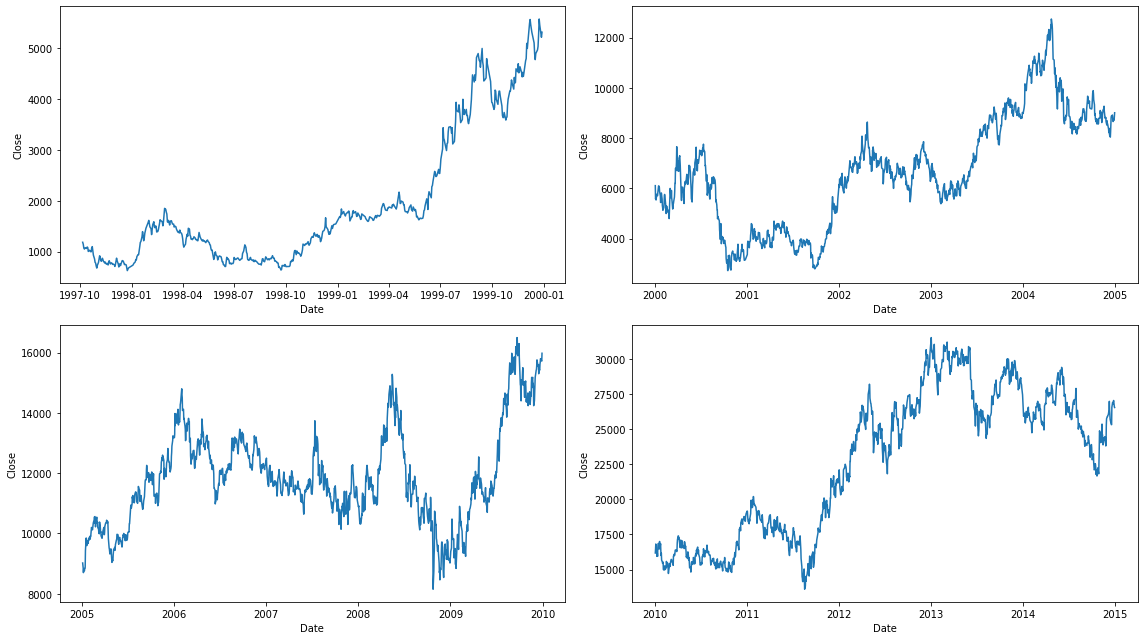

In [32]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
  ax = axes[i//2,i%2]
  df = stock.loc[(stock.index>=time_steps[i][0])&(stock.index<time_steps[i][1])]
  sns.lineplot(y=df['Close'],x=df.index,data=df,ax=ax)
plt.tight_layout()
plt.show()